# Laboratorio 3: Costo y Eficiencia Computacional

En este laboratorio se trabajan los conceptos de costo y eficiencia computacional cubiertos en la Clase 3. Investigaremos cómo diferentes enfoques de implementación afectan el rendimiento de las operaciones de álgebra lineal, visualizaremos la complejidad de notación 'Big O' a través de experimentos de tiempo, y examinaremos el impacto de las elecciones de hardware y software en el rendimiento computacional.

Al final de este laboratorio, serás capaz de:
1. Comprender el impacto práctico de la vectorización, el broadcasting y la paralelización
2. Medir empíricamente y visualizar la complejidad de algoritmos
3. Evaluar la eficiencia de diferentes enfoques para resolver sistemas lineales
4. OPCIONAL: Tener experiencia en la creación de perfiles de código y optimización del rendimiento

## Estructura del laboratorio
1. Vectorización y Broadcasting 
    - 1.0 Medición de tiempos de ejecución
    - 1.1 Bucles vs. operaciones vectorizadas
    - 1.2 Broadcasting
2. Visualización de la complejidad computacional de algoritmos
    - 2.1 Medición empírica de los tiempos de ejecución vs. tamaño de entrada
    - 2.2 Distintos métodos de resolución de sistemas lineales


## 1. Vectorización, Broadcasting y Paralelización

La vectorización y el broadcasting son funcionalidades nativas de NumPy que permiten acelerar el código al realizar operaciones de álgebra lineal. Las mismas permiten evitar el uso de bucles, y delegar la ejecución de operaciones a implementaciones ya optimizadas en C y Fortran. En esta sección se presentan ejemplos de cómo acelerar el código con NumPy.

### 1.0 Medición de Tiempos

El módulo `timeit` ayuda a medir el tiempo de ejecución.  En la siguiente celda se presenta un ejemplo de cómo medir el tiempo de ejecución de una operación de inversión de matrices en función del tamaño de la matriz.

**Notas:** Si bien el módulo `timeit` es bastante preciso, a la hora de medir tiempos de ejecución, deben tenerse en cuenta las siguientes consideraciones:
- El tiempo de ejecución puede variar entre ejecuciones, según la carga de la máquina/entorno, y el perfil de uso de energía del dispositivo (power throttling, thermal throttling).  El primer problema puede mitigarse ejecutando varias veces el código y promediando los tiempos. El segundo problema puede mitigarse ejecutando el código en un entorno controlado.
- El tiempo de ejecución varía según el hardware subyacente, y las versiones de software utilizadas.
- Cuando el tiempo de ejecución es muy corto, la precisión de `timeit` puede no ser suficiente. Distintos ambientes de desarrollo ofrecen herramientas más precisas para medir tiempos de ejecución.

In [1]:
# Ejemplo: Medición del tiempo de inversión matricial
import numpy as np
import timeit
import matplotlib.pyplot as plt
def tiempo_inversion(n):
    """Mide el tiempo de inversión de una matriz n×n."""
    # Crear una matriz aleatoria n×n
    A = np.random.rand(n, n)
    
    # Medir el tiempo de inversión
    N=100
    t = timeit.timeit(lambda: np.linalg.inv(A), number=N)
    
    return t / N  # Tiempo promedio por inversión

# Prueba para matriz de 1000x1000
tiempo = tiempo_inversion(1000) 
print(f"Tiempo de inversión de matriz 100x100: {tiempo:.2e} s")

Tiempo de inversión de matriz 100x100: 1.05e-01 s


### 1.1 Vectorización

La vectorización es el proceso de reemplazar bucles (`for`) con operaciones vectoriales, lo que puede mejorar significativamente el rendimiento.  Como regla general, se debe evitar el uso de bucles siempre que sea posible, y en su lugar utilizar operaciones vectoriales.  

Adicionalmente, las funciones nativas de NumPy están optimizadas para operar sobre arreglos de manera eficiente, y su uso puede acelerar significativamente el código.  En general, se recomienda utilizar funciones de NumPy en lugar de implementar operaciones manualmente.

En la siguiente celda se presentan ejemplos de lo anterior.

In [2]:
# Ejemplo: Cálculo de la distancia euclidiana entre puntos
def distancia_euclidiana_bucle(x, y):
    """Calcula la distancia euclidiana usando un bucle."""
    if len(x) != len(y):
        raise ValueError("Los vectores deben tener la misma longitud")
    
    suma_cuadrados = 0
    for i in range(len(x)):
        suma_cuadrados += (x[i] - y[i]) ** 2
    
    return np.sqrt(suma_cuadrados)

def distancia_euclidiana_vector(x, y):
    """Calcula la distancia euclidiana usando vectorización."""
    return np.sqrt(np.sum((x - y) ** 2))

def distancia_euclidiana_numpy(x, y):
    """Calcula la distancia euclidiana usando la función de NumPy."""
    return np.linalg.norm(x - y)

# Crear dos vectores aleatorios
n = 1000
x = np.random.rand(n)
y = np.random.rand(n)

# Medir tiempo de ambos enfoques
tiempo_bucle = timeit.timeit(lambda: distancia_euclidiana_bucle(x, y), number=1000)
tiempo_vector = timeit.timeit(lambda: distancia_euclidiana_vector(x, y), number=1000)
tiempo_norma = timeit.timeit(lambda: distancia_euclidiana_numpy(x, y), number=1000)

print(f"Enfoque basado en bucle: {tiempo_bucle:.6f} segundos")
print(f"Enfoque vectorizado: {tiempo_vector:.6f} segundos")
print(f"Factor de aceleración: {tiempo_bucle / tiempo_vector:.2f}x")
print(f"Enfoque basado en norma: {tiempo_norma:.6f} segundos")
print(f"Factor de aceleración: {tiempo_bucle / tiempo_norma:.2f}x")

Enfoque basado en bucle: 0.885509 segundos
Enfoque vectorizado: 0.016005 segundos
Factor de aceleración: 55.33x
Enfoque basado en norma: 0.009595 segundos
Factor de aceleración: 92.29x


**Ejercicio 1.1.1:** Implemente y compare versiones basadas en bucles y vectorizadas de:
1. Cálculo de la media de un vector grande
2. Encontrar el elemento máximo en cada fila de una matriz
3. Cálculo del producto elemento por elemento de dos vectores grandes

**Ejercicio 1.1.2:** Escribe una función para calcular el producto escalar de dos vectores:
1. Implementa una versión basada en bucle
2. Usando `np.sum(v1 * v2)`
3. Usando `np.dot` o `@`
3. Compara su rendimiento para vectores de diferentes tamaños

In [3]:
# -----------------------------------
# Ejercicio 1.1.1
# -----------------------------------

def media_de_vector(vector):
    suma = 0
    for elemento in vector:
        suma += elemento
    return suma / len(vector)


def media_vectorizado(vector):
    return np.mean(vector)

vec_prueba = np.random.rand(10000)

tiempo_media_de_vector = timeit.timeit(lambda: media_de_vector(vec_prueba), number=1000)
tiempo_media_vectorizado = timeit.timeit(lambda: media_vectorizado(vec_prueba), number=1000)

print(f"Media usando bucle: {media_de_vector(vec_prueba):.6f}, Tiempo: {tiempo_media_de_vector:.6f} segundos")
print(f"Media usando vectorización: {media_vectorizado(vec_prueba):.6f}, Tiempo: {tiempo_media_vectorizado:.6f} segundos")


matriz_prueba = np.random.rand(1000, 100)

def maximo_filas_bucle(matriz):
    maximos = []
    for fila in matriz:
        maximos.append(max(fila))
    return maximos

def maximo_filas_vectorizado(matriz):
    return np.max(matriz, axis=1)

tiempo_maximo_bucle = timeit.timeit(lambda: maximo_filas_bucle(matriz_prueba), number=100)
tiempo_maximo_vectorizado = timeit.timeit(lambda: maximo_filas_vectorizado(matriz_prueba), number=100)

print(f"Tiempo para encontrar máximos por fila usando bucle: {tiempo_maximo_bucle:.6f} segundos")
print(f"Tiempo para encontrar máximos por fila usando vectorización: {tiempo_maximo_vectorizado:.6f} segundos")


z = np.random.rand(len(y))

def producto_elemento_bucle(v1, v2):
    producto = []
    for i in range(len(v1)):
        producto.append(v1[i] * v2[i])
    return producto


def producto_elemento_vectorizado(v1, v2):
    return v1 * v2


tiempo_producto_bucle = timeit.timeit(lambda: producto_elemento_bucle(y, z), number=1000)
tiempo_producto_vectorizado = timeit.timeit(lambda: producto_elemento_vectorizado(y, z), number=1000)

print(f"Tiempo para producto elemento por elemento usando bucle: {tiempo_producto_bucle:.6f} segundos")
print(f"Tiempo para producto elemento por elemento usando vectorización: {tiempo_producto_vectorizado:.6f} segundos")


Media usando bucle: 0.500992, Tiempo: 2.269262 segundos
Media usando vectorización: 0.500992, Tiempo: 0.016908 segundos
Tiempo para encontrar máximos por fila usando bucle: 1.488071 segundos
Tiempo para encontrar máximos por fila usando vectorización: 0.015997 segundos
Tiempo para producto elemento por elemento usando bucle: 0.546120 segundos
Tiempo para producto elemento por elemento usando vectorización: 0.002200 segundos


In [4]:
# --------------------------------------------
# Ejercicio 1.1.2
# --------------------------------------------

def producto_escalar_bucle(v1, v2):
    """Calcula el producto escalar usando un bucle."""
    resultado = 0
    for i in range(len(v1)):
        resultado += v1[i] * v2[i]
    return resultado

def producto_escalar_sum(v1, v2):
    """Calcula el producto escalar usando np.sum."""
    return np.sum(v1 * v2)

def producto_escalar_dot(v1, v2):
    """Calcula el producto escalar usando np.dot."""
    return np.dot(v1, v2)

tamaños_vectores = [100, 1000, 10000, 100000]
resultados = {}

for tamaño in tamaños_vectores:
    v1 = np.random.rand(tamaño)
    v2 = np.random.rand(tamaño)
    
    tiempo_bucle = timeit.timeit(lambda: producto_escalar_bucle(v1, v2), number=100)
    tiempo_sum = timeit.timeit(lambda: producto_escalar_sum(v1, v2), number=100)
    tiempo_dot = timeit.timeit(lambda: producto_escalar_dot(v1, v2), number=100)
    
    resultados[tamaño] = (tiempo_bucle, tiempo_sum, tiempo_dot)
    print(f"Tamaño: {tamaño}")
    print(f"Tiempo usando bucle: {tiempo_bucle:.6f} segundos")
    print(f"Tiempo usando np.sum: {tiempo_sum:.6f} segundos")
    print(f"Tiempo usando np.dot: {tiempo_dot:.6f} segundos\n")

Tamaño: 100
Tiempo usando bucle: 0.006155 segundos
Tiempo usando np.sum: 0.000853 segundos
Tiempo usando np.dot: 0.000393 segundos

Tamaño: 1000
Tiempo usando bucle: 0.070061 segundos
Tiempo usando np.sum: 0.001852 segundos
Tiempo usando np.dot: 0.000273 segundos

Tamaño: 10000
Tiempo usando bucle: 0.627864 segundos
Tiempo usando np.sum: 0.002575 segundos
Tiempo usando np.dot: 0.000643 segundos

Tamaño: 100000
Tiempo usando bucle: 6.455883 segundos
Tiempo usando np.sum: 0.014614 segundos
Tiempo usando np.dot: 0.014373 segundos



### 1.2 Broadcasting

El termino broadcasting se refiere a la capacidad de NumPy de realizar operaciones en arreglos (vectores/matrices) de diferentes formas de manera eficiente.  En general, NumPy realiza broadcasting cuando las dimensiones de dos arreglos son compatibles, lo que significa que las dimensiones son todas iguales o una de ellas es 1 en alguno de los objetos involucrados.  En la siguiente celda se presentan ejemplos de broadcasting.

In [5]:
# Ejemplo: Sumando un vector a cada fila de una matriz
# Crear una matriz y un vector
A = np.random.rand(5, 3)
v = np.random.rand(3)

print("Matriz A:")
print(A)
print(A.shape)
print("\nVector v:")
print(v)
print(v.shape)

# Enfoque basado en bucle
A_bucle = A.copy()
for i in range(A_bucle.shape[0]):
    for j in range(A_bucle.shape[1]):
        A_bucle[i, j] += v[j]

# Enfoque de broadcasting
A_broadcast = A + v

print("\nLos resultados son idénticos:", np.allclose(A_bucle, A_broadcast))

# El ejemplo anterior suma un vector a una fila de una matriz, pues numpy 'interpeta'
# el vector como una fila  o arreglo de tamaño (1,N).
# Si se desea sumar un vector a una columna de la matriz, se debe convertir el vector
# en una matriz columna, es decir, de tamaño (N,1).
# Ejemplo:
v2= np.random.random(5) #Vector fila
A_broadcast_columna = A + v2[:, np.newaxis] #Convertir el vector en una matriz columna (N,1)
print("\nVector v2 como matriz columna:")
print(v2[:, np.newaxis])
print("\nMatriz A+v2 (columna):")
print(A_broadcast_columna)

# Comparación de tiempo para un ejemplo más grande
A_grande = np.random.rand(1000, 100)
v_grande = np.random.rand(100)

def suma_bucle_elemento():
    resultado = A_grande.copy()
    for i in range(resultado.shape[0]):
        for j in range(resultado.shape[1]):
            resultado[i, j] += v_grande[j]
    return resultado

def suma_bucle_fila():
    resultado = A_grande.copy()
    for i in range(resultado.shape[0]):
        resultado[i,:] += v_grande
    return resultado

def suma_broadcast():
    return A_grande + v_grande

tiempo_bucle = timeit.timeit(suma_bucle_elemento, number=100)
tiempo_bucle_fila = timeit.timeit(suma_bucle_fila, number=100)
tiempo_broadcast = timeit.timeit(suma_broadcast, number=100)

print(f"\nEnfoque basado en bucle por elemento: {tiempo_bucle:.6f} segundos")
print(f"Enfoque de broadcasting: {tiempo_broadcast:.6f} segundos")
print(f"Factor de aceleración: {tiempo_bucle / tiempo_broadcast:.2f}x")
print(f"Enfoque basado en bucle por fila: {tiempo_bucle_fila:.6f} segundos")
print(f"Factor de aceleración: {tiempo_bucle / tiempo_bucle_fila:.2f}x")

Matriz A:
[[0.03699835 0.07732524 0.25510346]
 [0.04443585 0.84202039 0.24420619]
 [0.56906476 0.40806293 0.63151805]
 [0.43433868 0.032457   0.34193066]
 [0.4008867  0.11424758 0.4287055 ]]
(5, 3)

Vector v:
[0.73487744 0.036578   0.9969041 ]
(3,)

Los resultados son idénticos: True

Vector v2 como matriz columna:
[[0.27913105]
 [0.20769363]
 [0.36271   ]
 [0.14845461]
 [0.88336875]]

Matriz A+v2 (columna):
[[0.3161294  0.35645629 0.53423451]
 [0.25212947 1.04971402 0.45189982]
 [0.93177476 0.77077293 0.99422805]
 [0.58279329 0.18091161 0.49038527]
 [1.28425545 0.99761633 1.31207425]]

Enfoque basado en bucle por elemento: 7.917001 segundos
Enfoque de broadcasting: 0.010559 segundos
Factor de aceleración: 749.77x
Enfoque basado en bucle por fila: 0.234176 segundos
Factor de aceleración: 33.81x


**Ejercicio 1.2.1:** Usa broadcasting para:
1. Normalizar cada fila de una matriz dividiéndola por su suma
2. Restar la media de cada columna de cada elemento en esa columna
3. Calcular la distancia euclidiana entre un punto y un array de puntos

**Ejercicio 1.2.2:** Crea una visualización 2D que muestre:
1. Una cuadrícula de puntos en el espacio 2D y un solo punto en un color diferente
2. Calcula la distancia desde este punto a todos los puntos de la cuadrícula usando broadcasting
3. Visualiza las distancias como un mapa de calor o un gráfico de contorno

In [6]:
# ----------------------------------
# Ejercicio 1.2.1
# ----------------------------------

# 1. Normalizar cada fila de una matriz dividiéndola por su suma
def normalizar_filas(matriz):
    return matriz / matriz.sum(axis=1, keepdims=True) # {axis = 1} hace la suma a lo largo de la fila

matriz = np.random.rand(5, 3)
matriz_normalizada = normalizar_filas(matriz)
print("Matriz original:\n", matriz, "\n")
print("Matriz normalizada:\n", matriz_normalizada, "\n")

# 2. Restar la media de cada columna de cada elemento en esa columna
def restar_media_columnas(matriz):
    return matriz - matriz.mean(axis=0, keepdims=True) # {axis = 0} hace el promedio a lo largo de la columna

matriz_centrada = restar_media_columnas(matriz)
print("Matriz centrada (media de columnas restada):\n", matriz_centrada, "\n")

# 3. Calcular la distancia euclidiana entre un punto y un array de puntos
def distancia_euclidiana_broadcast(punto, puntos):
    return np.sqrt(np.sum((puntos - punto) ** 2, axis=1))

punto = np.random.rand(3)
puntos = np.random.rand(10, 3)
distancias = distancia_euclidiana_broadcast(punto, puntos)

print("Punto:\n", punto, "\n")
print("Array de puntos:\n", puntos, "\n")
print("Distancias euclidianas:\n", distancias, "\n")

Matriz original:
 [[0.85307464 0.98459302 0.48744678]
 [0.06035065 0.78092201 0.42101946]
 [0.9987267  0.27251631 0.03760375]
 [0.61431508 0.15445293 0.12433433]
 [0.67411942 0.80051196 0.60410086]] 

Matriz normalizada:
 [[0.36689576 0.42346003 0.20964421]
 [0.04781037 0.61865395 0.33353568]
 [0.76305854 0.20821101 0.02873045]
 [0.687844   0.17293979 0.13921622]
 [0.32429353 0.38509623 0.29061024]] 

Matriz centrada (media de columnas restada):
 [[ 0.21295734  0.38599378  0.15254574]
 [-0.57976665  0.18232277  0.08611842]
 [ 0.3586094  -0.32608294 -0.29729728]
 [-0.02580222 -0.44414632 -0.21056671]
 [ 0.03400212  0.20191271  0.26919983]] 

Punto:
 [0.22738648 0.46960718 0.9008637 ] 

Array de puntos:
 [[0.66393008 0.83353475 0.37181566]
 [0.2717675  0.14208093 0.43501254]
 [0.71887907 0.41365492 0.374298  ]
 [0.35212139 0.15820301 0.56970143]
 [0.73371778 0.52907717 0.88351014]
 [0.73363973 0.37827818 0.25829804]
 [0.67667848 0.44142042 0.26636218]
 [0.90374244 0.5004961  0.82464219]


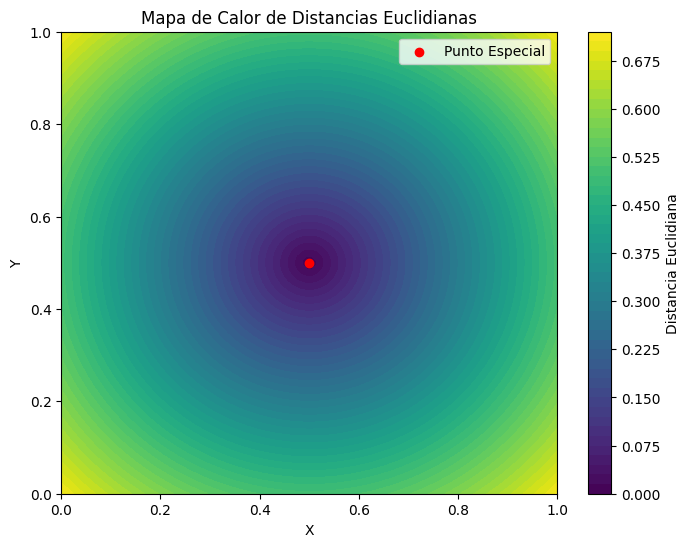

In [7]:
# ----------------------------------
# Ejercicio 1.2.2
# ----------------------------------
import matplotlib.pyplot as plt

# Crear una cuadrícula de puntos en el espacio 2D
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

punto_especial = np.array([0.5, 0.5])

distancias = np.sqrt((X - punto_especial[0])**2 + (Y - punto_especial[1])**2)

# Visualizar las distancias como un mapa de calor
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, distancias, levels=50, cmap='viridis')
plt.colorbar(label='Distancia Euclidiana')
plt.scatter(punto_especial[0], punto_especial[1], color='red', label='Punto Especial')
plt.title('Mapa de Calor de Distancias Euclidianas')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Parte 2: Visualizando la Complejidad Computacional de Algoritmos

### 2.1 Medición Empírica de los Tiempos de Ejecución vs. Tamaño de Entrada

La notación Big O proporciona límites de complejidad teóricos, pero las mediciones empíricas pueden validar estos límites y revelar características de rendimiento prácticas.  La siguiente celda define algunas funciones auxiliares útiles para medir los tiempos de ejecución de algoritmos en función del tamaño de la entrada, junto con un ejemplo de cómo usarlas.

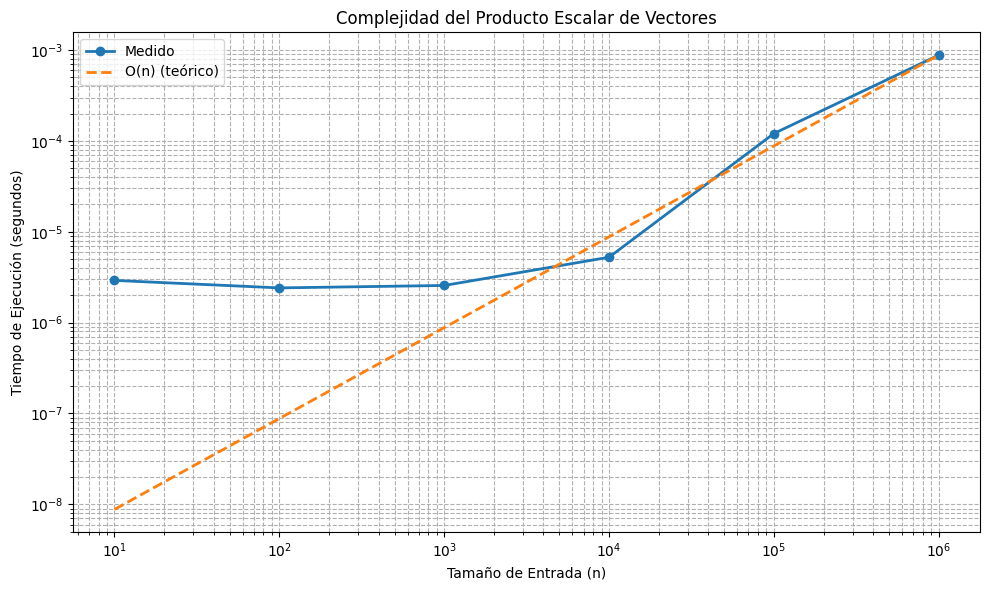

In [8]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
def medir_tiempo_ejecucion(func, tamaños, *args, repeticiones=3, **kwargs):
    """Mide el tiempo de ejecución de una función para diferentes tamaños de entrada."""
    tiempos = []
    for tamaño in tamaños:
        tiempos_tamaño = []
        entradas = [arg(tamaño) if callable(arg) else arg for arg in args]           
        # Medir tiempo de ejecución
        tiempo = timeit.timeit(lambda: func(*entradas, **kwargs), number=repeticiones)
        tiempos.append(tiempo/repeticiones)
    
    return np.array(tiempos)

def graficar_complejidad(tamaños, tiempos, etiquetas, titulo, escala_log=True):
    """Grafica tiempos de ejecución y curvas de complejidad teóricas."""
    plt.figure(figsize=(10, 6))
    
    # Graficar tiempos medidos
    plt.plot(tamaños, tiempos, 'o-', linewidth=2, label='Medido')
    
    # Graficar curvas teóricas
    for etiqueta, curva in etiquetas.items():
        # Normalizar para coincidir con el último punto medido
        normalizada = curva * (tiempos[-1] / curva[-1])
        plt.plot(tamaños, normalizada, '--', linewidth=2, label=f'{etiqueta} (teórico)')
    
    plt.xlabel('Tamaño de Entrada (n)')
    plt.ylabel('Tiempo de Ejecución (segundos)')
    plt.title(titulo)
    
    if escala_log:
        plt.xscale('log')
        plt.yscale('log')
        plt.grid(True, which="both", ls="--")
    
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ejemplo: Midiendo producto punto de vectores (esperado O(n))
tamaños = [10, 100, 1000, 10000, 100000, 1000000]

# Función para crear un vector aleatorio de tamaño dado
gen_vector = lambda n: np.random.rand(n)

# Medir tiempo de ejecución
tiempos = medir_tiempo_ejecucion(np.dot, tamaños, gen_vector, gen_vector, repeticiones=10000)

# Graficar resultados con curva teórica O(n)
graficar_complejidad(tamaños, tiempos, {'O(n)': np.array(tamaños)}, 'Complejidad del Producto Escalar de Vectores')

#### Ejercicios:

**Ejercicio 2.1.1:** Mide y visualiza la complejidad de las siguientes operaciones:
   - Suma de vectores (esperado O(n))
   - Multiplicación matriz-vector (esperado O(n²))
   - Multiplicación matriz-matriz (esperado O(n³) para implementación ingenua)
   - Cálculo del determinante de matriz (esperado O(n³))
   - Cálculo de la inversa de matriz (esperado O(n³))

Para cada operación, compara el tiempo medido con la curva de complejidad teórica. ¿Son consistentes? Si no, explica las discrepancias.



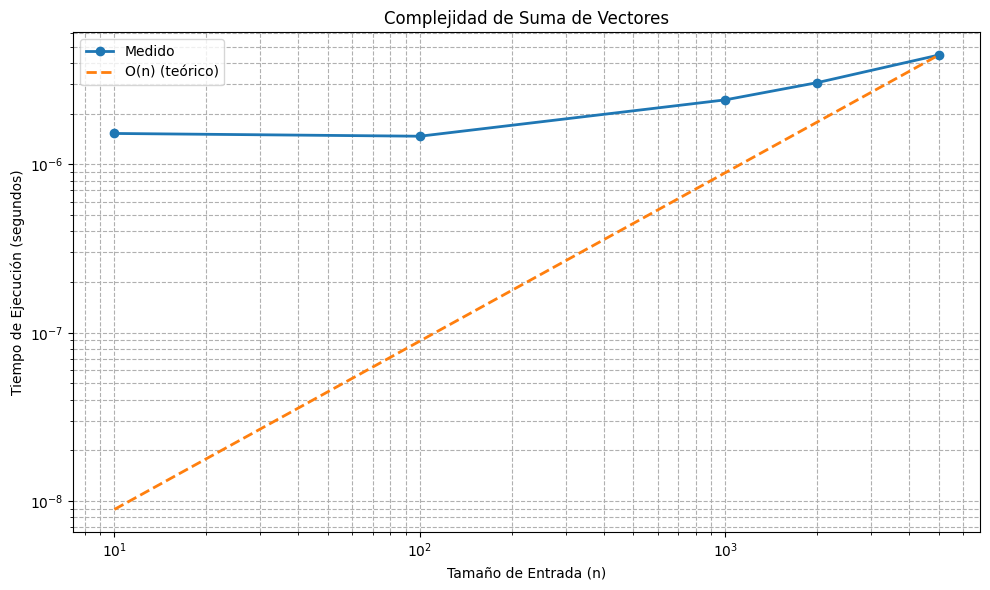

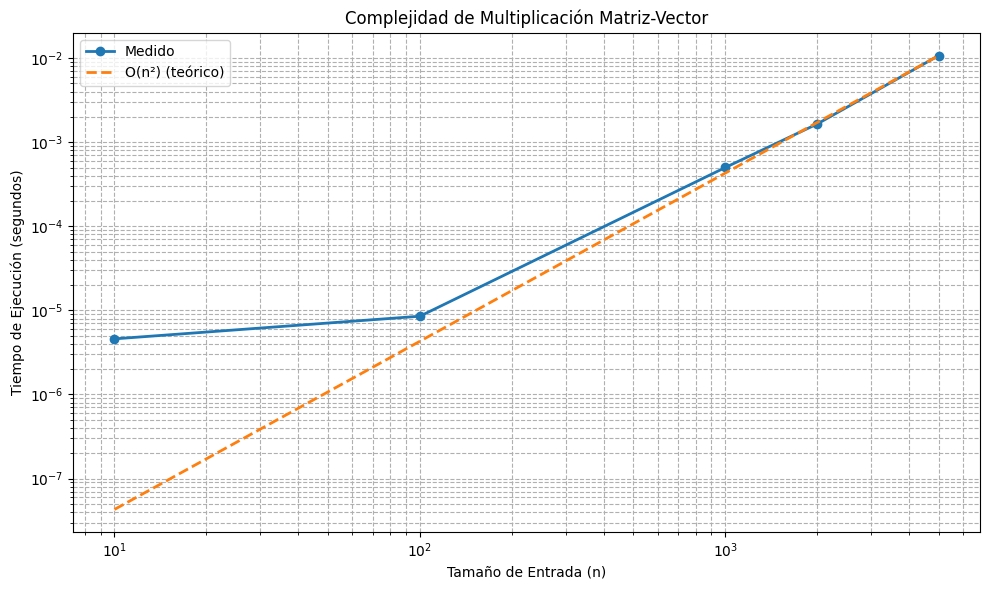

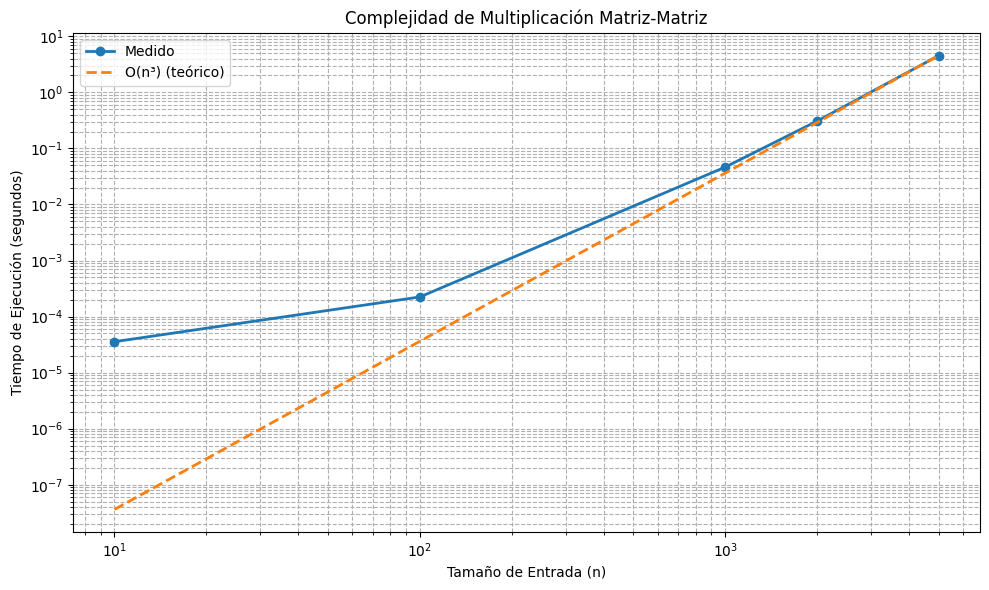

c:\Users\juanp\Desktop\ANCAP\ing-IA\Semestre 3\Matemáticas para el aprendizaje automático\venv\Lib\site-packages\numpy\linalg\_linalg.py:2430: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


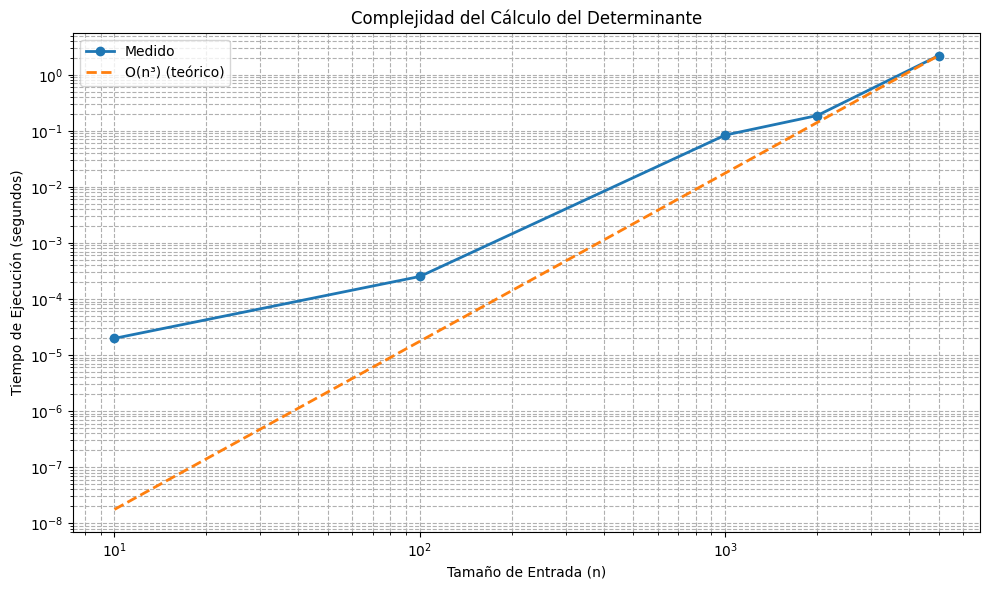

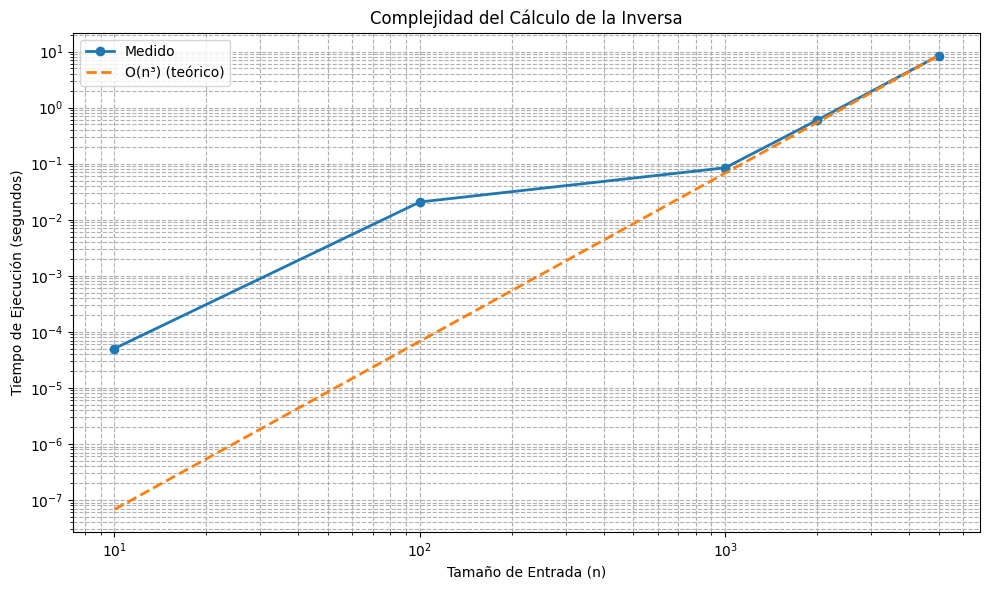

In [9]:
# -----------------------------------------
# Ejercicio 2.1.1 
# -----------------------------------------

# Función para generar una matriz aleatoria de tamaño dado
gen_matriz = lambda n: np.random.rand(n, n)
tamaños = [10, 100, 1000, 2000, 5000]

# Se agrega el exponente  los tamaños para verificar que la pendiente es el grado de complejidad


# 1. Suma de vectores
tiempos_suma_vectores = medir_tiempo_ejecucion(np.add, tamaños, gen_vector, gen_vector, repeticiones = 100000)
graficar_complejidad(tamaños, tiempos_suma_vectores, {'O(n)': np.array(tamaños)}, 
                     'Complejidad de Suma de Vectores')
# La suma de vectores muestra un crecimiento lineal del tiempo de ejecución con respecto al tamaño n.
# Aunque hay pequeñas variaciones para tamaños chicos debido a costos constantes, la tendencia general
# es consistente con una complejidad O(n).


# 2. Multiplicación matriz-vector
tiempos_matriz_vector = medir_tiempo_ejecucion(np.dot, tamaños, gen_matriz, gen_vector, repeticiones = 100)
graficar_complejidad(tamaños, tiempos_matriz_vector, {'O(n²)': np.array(tamaños)**2}, 
                     'Complejidad de Multiplicación Matriz-Vector')
# El tiempo de ejecución de la multiplicación matriz-vector crece aproximadamente como O(n^2),
# lo que es coherente con su complejidad teórica. A partir de n ≈ 100, la curva medida sigue
# muy de cerca la pendiente cuadrática esperada.


# 3. Multiplicación matriz-matriz
tiempos_matriz_matriz = medir_tiempo_ejecucion(np.dot, tamaños, gen_matriz, gen_matriz, repeticiones = 10)
graficar_complejidad(tamaños, tiempos_matriz_matriz, {'O(n³)': np.array(tamaños)**3}, 
                     'Complejidad de Multiplicación Matriz-Matriz')
# Para la multiplicación entre matrices, el tiempo medido crece como O(n^3), especialmente en tamaños grandes.
# La curva medida se ajusta bien a la teórica, aunque en n pequeños puede haber optimizaciones internas
# que reduzcan el tiempo más allá de lo esperado.


# 4. Cálculo del determinante de matriz
tiempos_determinante = medir_tiempo_ejecucion(np.linalg.det, tamaños, gen_matriz, repeticiones = 10)
graficar_complejidad(tamaños, tiempos_determinante, {'O(n³)': np.array(tamaños)**3}, 
                     'Complejidad del Cálculo del Determinante')
# El cálculo del determinante sigue una tendencia cúbica en función del tamaño de la matriz.
# Esto es esperable, ya que internamente se usan algoritmos con complejidad O(n^3) como la descomposición LU.


# 5. Cálculo de la inversa de matriz
tiempos_inversa = medir_tiempo_ejecucion(np.linalg.inv, tamaños, gen_matriz, repeticiones=5)
graficar_complejidad(tamaños, tiempos_inversa, {'O(n³)': np.array(tamaños)**3},
                     'Complejidad del Cálculo de la Inversa')
# El tiempo de cálculo de la inversa de una matriz crece de manera cúbica, lo cual es coherente
# con la complejidad teórica O(n^3). La curva empírica se alinea muy bien con la predicción teórica.


### 2.2 Resolviendo Sistemas Lineales: Eliminación Gaussiana vs. Inversión de Matrices

Comparemos diferentes enfoques para resolver sistemas lineales de la forma Ax = b y verifiquemos su complejidad teórica.  Se utilizarán las funciones `np.linalg.solve` y `np.linalg.inv` para resolver sistemas lineales y medir su rendimiento. 

A continuación se brinda una función auxiliar para generar problemas de sistemas lineales de tamaño n.  También se brindan funciones (**para completar**) para resolver sistemas lineales mediante eliminación gaussiana y mediante inversión de matrices.

In [10]:
def generar_sistema_aleatorio(n):
    """Genera un sistema lineal aleatorio no singular de tamaño n."""
    A = np.random.rand(n, n)
    A = A @ A.T + n * np.eye(n)
    b = np.random.rand(n)
    return A, b

def resolver_por_inversa(A, b):
    """Resuelve un sistema lineal usando inversión de matriz."""
    x = np.linalg.inv(A) @ b
    return x

def resolver_por_gaussiana(A, b):
    """Resuelve un sistema lineal usando eliminación gaussiana (vía numpy.linalg.solve)."""
    x = np.linalg.solve(A, b)
    return x

# Ejemplo de uso:
A, b = generar_sistema_aleatorio(3)
print("Matriz A:")
print(A)
print("\nVector b:")
print(b)
x_inv = resolver_por_inversa(A, b)
x_gauss = resolver_por_gaussiana(A, b)
print("\nSolución por inversa:")
print(x_inv)
print("\nSolución por eliminación gaussiana:")
print(x_gauss)
print("\nDiferencia entre soluciones:", np.linalg.norm(x_inv - x_gauss))
#Verificar que es una solución correcta
print("\nVerificación de la solución x:")
print("Ax-b:")
print(A @ x_gauss - b)
print("Norma de Ax-b:", np.linalg.norm(A @ x_gauss - b))


Matriz A:
[[3.59640201 0.40025217 0.59514556]
 [0.40025217 3.40097208 0.46350605]
 [0.59514556 0.46350605 3.6266267 ]]

Vector b:
[0.66019061 0.91637563 0.99347057]

Solución por inversa:
[0.12129831 0.22445844 0.2253451 ]

Solución por eliminación gaussiana:
[0.12129831 0.22445844 0.2253451 ]

Diferencia entre soluciones: 3.1031676915590914e-17

Verificación de la solución x:
Ax-b:
[ 0.00000000e+00  0.00000000e+00 -1.11022302e-16]
Norma de Ax-b: 1.1102230246251565e-16


#### Ejercicios:

**Ejercicio 2.2.1:** Compara el rendimiento de diferentes enfoques para resolver sistemas lineales:
   - Usando inversión de matriz (A⁻¹b)
   - Usando eliminación gaussiana (solución directa)
   
Para ambos métodos, mide el tiempo de ejecución en función del tamaño de la matriz A y grafica utilizando las funciones introducidas anteriormente.  Verifica que las soluciones de ambos son efectivamente soluciones al sistema.

**Ejercicio 2.2.2:** Implementa tu propia versión de eliminación gaussiana (sin usar la función solve de NumPy). Mide su rendimiento y compáralo con la implementación de NumPy.


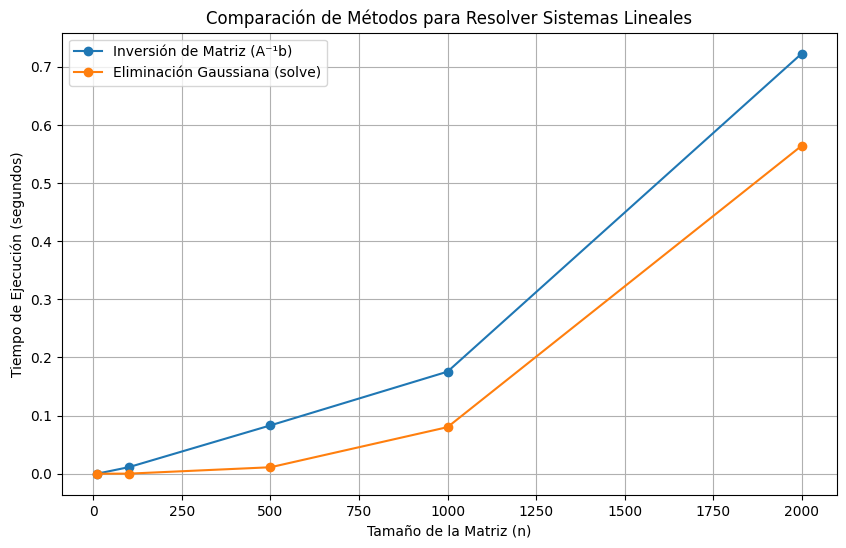

In [11]:
# -----------------------------
# Ejercicio 2.2.1
# -----------------------------

tamaños = [10, 100, 500, 1000, 2000]
tiempos_inversa = []
tiempos_gaussiana = []

for tamaño in tamaños:
    A, b = generar_sistema_aleatorio(tamaño)
    
    # Medir tiempo para resolver por inversión
    tiempo_inversa = timeit.timeit(lambda: resolver_por_inversa(A, b), number=5)
    tiempos_inversa.append(tiempo_inversa / 5)
    
    # Medir tiempo para resolver por eliminación gaussiana
    tiempo_gaussiana = timeit.timeit(lambda: resolver_por_gaussiana(A, b), number=5)
    tiempos_gaussiana.append(tiempo_gaussiana / 5)

plt.figure(figsize=(10, 6))
plt.plot(tamaños, tiempos_inversa, 'o-', label='Inversión de Matriz (A⁻¹b)')
plt.plot(tamaños, tiempos_gaussiana, 'o-', label='Eliminación Gaussiana (solve)')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Métodos para Resolver Sistemas Lineales')
plt.legend()
plt.grid(True)
plt.show()


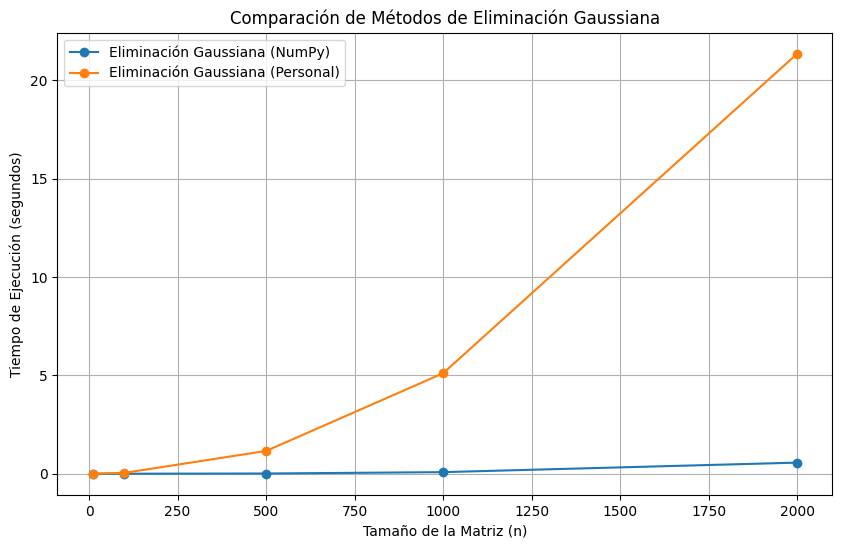

In [12]:
# ---------------------------
# Ejercicio 2.2.2
# ---------------------------
def eliminacion_gaussiana(A, b):
    
    n = len(b) # Número de incógnitas

    # Crear una copia de A y b y pasarla a float para evitar errores
    A = A.astype(float).copy()
    b = b.astype(float).copy()

    # Eliminación hacia adelante
    for i in range(n):
        # Pivoteo parcial: intercambiar filas si el pivote es cero
        if A[i, i] == 0:
            for j in range(i + 1, n):
                if A[j, i] != 0:
                    A[[i, j]] = A[[j, i]]
                    b[[i, j]] = b[[j, i]]
                    break

        # Normalizar la fila actual
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return x

# Medir el rendimiento de la implementación personalizada
tiempos_gaussiana_personal = []
for tamaño in tamaños:
    A, b = generar_sistema_aleatorio(tamaño)
    tiempo_gaussiana_personal = timeit.timeit(lambda: eliminacion_gaussiana(A, b), number=5)
    tiempos_gaussiana_personal.append(tiempo_gaussiana_personal / 5)

# Graficar comparación de tiempos
plt.figure(figsize=(10, 6))
plt.plot(tamaños, tiempos_gaussiana, 'o-', label='Eliminación Gaussiana (NumPy)')
plt.plot(tamaños, tiempos_gaussiana_personal, 'o-', label='Eliminación Gaussiana (Personal)')
plt.xlabel('Tamaño de la Matriz (n)')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Comparación de Métodos de Eliminación Gaussiana')
plt.legend()
plt.grid(True)
plt.show()
